In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

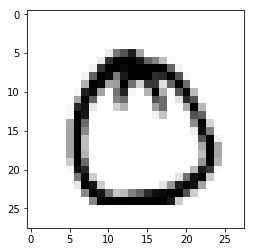

In [2]:
data, labels = mnist['data'], mnist['target']
plt.imshow(data[1000].reshape(28,28), cmap='binary')

6.0

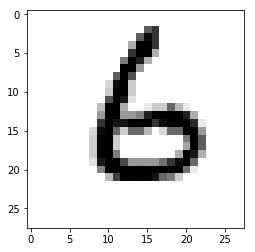

In [6]:
data_train, data_test, labels_train, labels_test = data[:60000], data[60000:], labels[:60000], labels[60000:]
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
data_train, labels_train = data_train[shuffle_index], labels_train[shuffle_index]
data_train, data_test, labels_train, labels_test = data_train[:5000], data_test[:500], labels_train[:5000], labels_test[:500]
plt.imshow(data_train[4998].reshape(28,28), cmap='binary')
labels_train[4998]

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=4)
knc.fit(data_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
labels_train_predic = cross_val_predict(knc, data_train, labels_train, cv=3)
from sklearn.metrics import accuracy_score
accuracy_score(labels_train, labels_train_predic)

0.92120000000000002

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'n_neighbors': [3, 5, 7], 'leaf_size': [15, 30, 45, 60]
    }
]
knc_search = KNeighborsClassifier()
grid_search = GridSearchCV(knc_search, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(data_train, labels_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [3, 5, 7], 'leaf_size': [15, 30, 45, 60]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [16]:
grid_search.best_params_

{'leaf_size': 15, 'n_neighbors': 3}

In [17]:
grid_search.best_score_

-1.2549999999999999

In [19]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(data_test)
accuracy_score(labels_test, y_pred)

0.98599999999999999